In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

#Imported the Necessary Library

In [2]:
pwd


'C:\\Users\\HP'

In [3]:
df=pd.read_csv(r'C:\Users\HP\Downloads\archive (19)\fifa21 raw data v2.csv')

df.info()

#importig the files

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

C:\Users\HP\AppData\Local\Temp\ipykernel_16748\1277125470.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'C:\Users\HP\Downloads\archive (19)\fifa21 raw data v2.csv')


In [4]:
#getting the Shape of the data

shaping=df.shape

print(f'The shape Of the Dataset, we have {shaping[0]} rows and {shaping[1]} columns ')

The shape Of the Dataset, we have 18979 rows and 77 columns 


In [5]:
#the Top Five

df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [6]:
#Getting the Max Columns, we want to get to see all of the columns


pd.set_option('Display.max_columns',77)

In [7]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


<AxesSubplot:ylabel='None'>

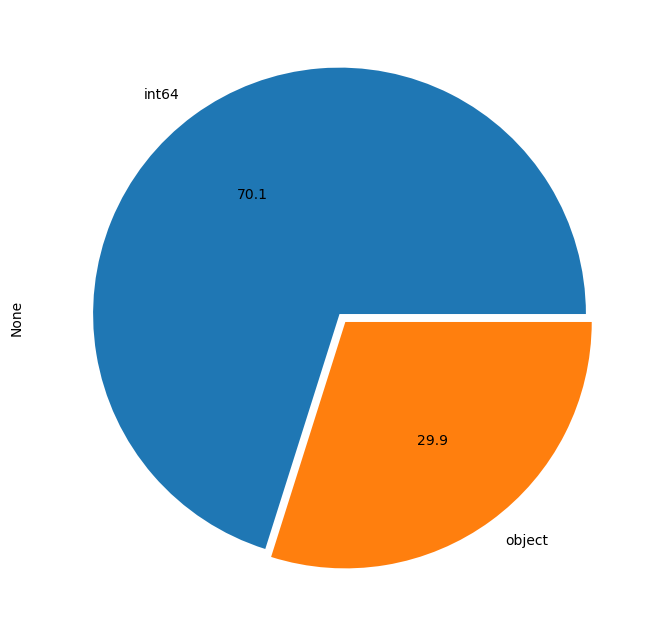

In [8]:
#plotting out the Data Types


df.dtypes.value_counts().plot.pie(autopct='%.1f',explode=[0.02,0.02],figsize=(12,8))

In [9]:
#Fresh Start

df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [10]:
#last five, Just to have a good view of our how data look Alike


df.tail()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,\n\n\n\nWuhan Zall,2018 ~ 2022,CB,178cm,66kg,Right,49,CB,"Jul 13, 2018",NaN,€100K,€1K,€70K,145,23,26,43,26,27,142,27,23,21,29,42,294,68,60,69,46,51,221,36,57,54,50,24,192,48,50,28,28,38,44,147,45,52,50,45,7,8,5,14,11,1186,255,2 ★,2★,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,\n\n\n\nOldham Athletic,2020 ~ 2021,CM,175cm,65kg,Right,51,CAM,"Aug 1, 2020",NaN,€130K,€500,€165K,211,38,42,40,56,35,219,46,40,35,50,48,305,63,64,61,51,66,226,48,58,43,47,30,193,40,23,47,47,36,38,116,32,44,40,45,12,10,9,6,8,1315,281,2 ★,2★,Medium,Medium,1 ★,64,40,48,49,35,45,NaN
18976,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47,65,\n\n\n\nDerry City,2019 ~ 2020,CM,179cm,74kg,Right,49,CAM,"Mar 8, 2019",NaN,€120K,€500,€131K,200,30,34,43,54,39,207,43,39,31,47,47,290,59,66,51,47,67,242,45,52,50,54,41,230,56,42,47,43,42,43,121,33,43,45,48,13,12,6,6,11,1338,285,2 ★,2★,Medium,Medium,1 ★,63,39,44,46,40,53,NaN
18977,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47,57,\n\n\n\nDalian YiFang FC,2020 ~ 2022,RW,175cm,69kg,Right,48,ST,"Sep 22, 2020",NaN,€100K,€2K,€88K,215,45,52,34,42,42,194,51,35,31,31,46,254,62,55,50,33,54,235,56,45,46,48,40,190,31,25,42,46,46,45,100,26,32,42,55,14,12,9,8,12,1243,271,3 ★,2★,Medium,Medium,1 ★,58,49,41,49,30,44,NaN
18978,252520,Zhou Xiao,Xiao Zhou,https://cdn.sofifa.com/players/252/520/21_60.png,http://sofifa.com/player/252520/xiao-zhou/210006/,China PR,21,47,57,\n\n\n\nDalian YiFang FC,2019 ~ 2023,"CB, LB",188cm,75kg,Left,50,LB,"Jul 29, 2019",NaN,€100K,€1K,€79K,163,40,18,40,45,20,171,40,33,20,40,38,279,60,63,57,47,52,231,37,66,60,55,13,185,45,47,33,33,27,33,136,45,46,45,50,10,11,7,10,12,1215,265,3 ★,2★,Medium,Medium,1 ★,62,22,39,42,45,55,NaN


In [11]:
#As we Observe we gat Numeric column and objective columns,
#we startingw e with Object columns, so we calling On object column

cate_df=df.select_dtypes('object')

In [12]:
cate_df

,Name,LongName,photoUrl,playerUrl,Nationality,Club,Contract,Positions,Height,Weight,Preferred Foot,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,W/F,SM,A/W,D/W,IR,Hits
0,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,4 ★,4★,Medium,Low,5 ★,771
1,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,4 ★,5★,High,Low,5 ★,562
2,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,3 ★,1★,Medium,Medium,3 ★,150
3,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,5 ★,4★,High,High,4 ★,207
4,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,5 ★,5★,High,Medium,5 ★,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,\n\n\n\nWuhan Zall,2018 ~ 2022,CB,178cm,66kg,Right,CB,"Jul 13, 2018",NaN,€100K,€1K,€70K,2 ★,2★,Medium,Medium,1 ★,NaN
18975,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,\n\n\n\nOldham Athletic,2020 ~ 2021,CM,175cm,65kg,Right,CAM,"Aug 1, 2020",NaN,€130K,€500,€165K,2 ★,2★,Medium,Medium,1 ★,NaN
18976,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,\n\n\n\nDerry City,2019 ~ 2020,CM,179cm,74kg,Right,CAM,"Mar 8, 2019",NaN,€120K,€500,€131K,2 ★,2★,Medium,Medium,1 ★,NaN
18977,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,\n\n\n\nDalian YiFang FC,2020 ~ 2022,RW,175cm,69kg,Right,ST,"Sep 22, 2020",NaN,€100K,€2K,€88K,3 ★,2★,Medium,Medium,1 ★,NaN


In [13]:
#here we go Go, We Get down to work
#data Cleaning 

df['Club']=df['Club'].replace('\n\n\n','',regex=True) # we takng the unnecessary string
df['Contract']=df['Contract'].replace('~','',regex=True) 

In [14]:
#double checking if it works?

df.head(3)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\nFC Barcelona,2004 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\nJuventus,2018 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\nAtlético Madrid,2014 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150


In [15]:
#i want to properly get to see how our data loook Like
#then we create a def function

def uniqueness(df):
    for col in df.columns:
        if df[col].dtypes=='object':
            print(f'{col}:{df[col].unique()}')

In [16]:
#Yes, checking The Uniquness

uniqueness(df)

Name:['L. Messi' 'Cristiano Ronaldo' 'J. Oblak' ... 'R. McKinley'
 "Wang Zhen'ao" 'Zhou Xiao']
LongName:['Lionel Messi' 'C. Ronaldo dos Santos Aveiro' 'Jan Oblak' ...
 'Ronan McKinley' "Zhen'ao Wang" 'Xiao Zhou']
photoUrl:['https://cdn.sofifa.com/players/158/023/21_60.png'
 'https://cdn.sofifa.com/players/020/801/21_60.png'
 'https://cdn.sofifa.com/players/200/389/21_60.png' ...
 'https://cdn.sofifa.com/players/252/757/21_60.png'
 'https://cdn.sofifa.com/players/243/790/21_60.png'
 'https://cdn.sofifa.com/players/252/520/21_60.png']
playerUrl:['http://sofifa.com/player/158023/lionel-messi/210006/'
 'http://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/210006/'
 'http://sofifa.com/player/200389/jan-oblak/210006/' ...
 'http://sofifa.com/player/252757/ronan-mckinley/210006/'
 'http://sofifa.com/player/243790/zhenao-wang/210006/'
 'http://sofifa.com/player/252520/xiao-zhou/210006/']
Nationality:['Argentina' 'Portugal' 'Slovenia' 'Belgium' 'Brazil' 'Poland' 'Egypt'
 'France' 'Germany

In [17]:
#having get to see what out values really look like,
#then i take the necessary step the take off the unwanted string by replacing the string value with empty values.


df['Contract']=df['Contract'].str.replace(' ','-',regex=True)
df['Club']=df['Club'].str.replace('\n','',regex=True)
df['Value']=df['Value'].replace('€','',regex=True)
df['Wage']=df['Wage'].replace('€','',regex=True)
df['Release Clause']=df['Release Clause'].replace('€','',regex=True)

In [18]:
#double checking


df.head(3)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004--2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,103.5M,560K,138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018--2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,63M,220K,75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014--2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,120M,125K,159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150


In [19]:
#checking what next on my rader to clean up

uniqueness(df)

Name:['L. Messi' 'Cristiano Ronaldo' 'J. Oblak' ... 'R. McKinley'
 "Wang Zhen'ao" 'Zhou Xiao']
LongName:['Lionel Messi' 'C. Ronaldo dos Santos Aveiro' 'Jan Oblak' ...
 'Ronan McKinley' "Zhen'ao Wang" 'Xiao Zhou']
photoUrl:['https://cdn.sofifa.com/players/158/023/21_60.png'
 'https://cdn.sofifa.com/players/020/801/21_60.png'
 'https://cdn.sofifa.com/players/200/389/21_60.png' ...
 'https://cdn.sofifa.com/players/252/757/21_60.png'
 'https://cdn.sofifa.com/players/243/790/21_60.png'
 'https://cdn.sofifa.com/players/252/520/21_60.png']
playerUrl:['http://sofifa.com/player/158023/lionel-messi/210006/'
 'http://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/210006/'
 'http://sofifa.com/player/200389/jan-oblak/210006/' ...
 'http://sofifa.com/player/252757/ronan-mckinley/210006/'
 'http://sofifa.com/player/243790/zhenao-wang/210006/'
 'http://sofifa.com/player/252520/xiao-zhou/210006/']
Nationality:['Argentina' 'Portugal' 'Slovenia' 'Belgium' 'Brazil' 'Poland' 'Egypt'
 'France' 'Germany

In [20]:
#get he date columns in proper Format

df['Joined']=pd.to_datetime(df['Joined'])

In [21]:
#Chnaging the Values to their initial values.

new_values = []

for val in df.Value:
    if 'M' in val:
        raw_figure = float(val.split('M')[0])
        new_values.append(raw_figure*1000000)
    
    elif 'K' in val:
        raw_figure = float(val.split('K')[0])
        new_values.append(raw_figure*1000)
        
    else:
        new_values.append(val)

In [22]:
#appplying The function.

df['Value'] = pd.Series(new_values, dtype=float) 

In [23]:
#Changing the Values to their initial values.

new_values = []

for val in df.Wage:
    if 'M' in val:
        raw_figure = float(val.split('M')[0])
        new_values.append(raw_figure*1000000)
    
    elif 'K' in val:
        raw_figure = float(val.split('K')[0])
        new_values.append(raw_figure*1000)
        
    else:
        new_values.append(val)

In [24]:
#apply the function

df['Wage']=pd.Series(new_values,dtype=float)

In [25]:
#Changing the Values to their initial values.

new_values = []

for val in df['Release Clause']:
    if 'M' in val:
        raw_figure = float(val.split('M')[0])
        new_values.append(raw_figure*1000000)
    
    elif 'K' in val:
        raw_figure = float(val.split('K')[0])
        new_values.append(raw_figure*1000)
        
    else:
        new_values.append(val)

In [26]:
#apply The function

df['Release Clause']=pd.Series(new_values,dtype=float)

In [27]:
#checking

df.head(3)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004--2021,"RW, ST, CF",170cm,72kg,Left,93,RW,2004-07-01,NaN,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018--2022,"ST, LW",187cm,83kg,Right,92,ST,2018-07-10,NaN,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014--2023,GK,188cm,87kg,Right,91,GK,2014-07-16,NaN,120000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150


In [28]:
#checking the format for the loan date 

df['Loan Date End'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18979 entries, 0 to 18978
Series name: Loan Date End
Non-Null Count  Dtype 
--------------  ----- 
1013 non-null   object
dtypes: object(1)
memory usage: 148.4+ KB


In [29]:
#Checking the nature of The Value

df['Loan Date End'].unique()

array([nan, 'Jun 30, 2021', 'Dec 31, 2020', 'Jan 30, 2021',
       'Jun 30, 2022', 'May 31, 2021', 'Jul 5, 2021', 'Dec 31, 2021',
       'Jul 1, 2021', 'Jan 1, 2021', 'Aug 31, 2021', 'Jan 31, 2021',
       'Dec 30, 2021', 'Jun 23, 2021', 'Jan 3, 2021', 'Nov 27, 2021',
       'Jan 17, 2021', 'Jun 30, 2023', 'Jul 31, 2021', 'Nov 22, 2020',
       'May 31, 2022', 'Dec 30, 2020', 'Jan 4, 2021', 'Nov 30, 2020',
       'Aug 1, 2021'], dtype=object)

In [30]:
#checking the data type

df['Loan Date End'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18979 entries, 0 to 18978
Series name: Loan Date End
Non-Null Count  Dtype 
--------------  ----- 
1013 non-null   object
dtypes: object(1)
memory usage: 148.4+ KB


In [31]:
#checking for the MisssinG Values,

df['Loan Date End'].isnull().sum()

17966

In [33]:
#checking for the particular area where we gat the missinG value?

df[df.isnull().any(axis=1)]

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004--2021,"RW, ST, CF",170cm,72kg,Left,93,RW,2004-07-01,NaN,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018--2022,"ST, LW",187cm,83kg,Right,92,ST,2018-07-10,NaN,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014--2023,GK,188cm,87kg,Right,91,GK,2014-07-16,NaN,120000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015--2023,"CAM, CM",181cm,70kg,Right,91,CAM,2015-08-30,NaN,129000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017--2022,"LW, CAM",175cm,68kg,Right,91,LW,2017-08-03,NaN,132000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,Wuhan Zall,2018--2022,CB,178cm,66kg,Right,49,CB,2018-07-13,NaN,100000.0,1000.0,70000.0,145,23,26,43,26,27,142,27,23,21,29,42,294,68,60,69,46,51,221,36,57,54,50,24,192,48,50,28,28,38,44,147,45,52,50,45,7,8,5,14,11,1186,255,2 ★,2★,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,Oldham Athletic,2020--2021,CM,175cm,65kg,Right,51,CAM,2020-08-01,NaN,130000.0,500.0,165000.0,211,38,42,40,56,35,219,46,40,35,50,48,305,63,64,61,51,66,226,48,58,43,47,30,193,40,23,47,47,36,38,116,32,44,40,45,12,10,9,6,8,1315,281,2 ★,2★

In [36]:
#checking the Values again

df['Loan Date End'].unique()

array([nan, 'Jun 30, 2021', 'Dec 31, 2020', 'Jan 30, 2021',
       'Jun 30, 2022', 'May 31, 2021', 'Jul 5, 2021', 'Dec 31, 2021',
       'Jul 1, 2021', 'Jan 1, 2021', 'Aug 31, 2021', 'Jan 31, 2021',
       'Dec 30, 2021', 'Jun 23, 2021', 'Jan 3, 2021', 'Nov 27, 2021',
       'Jan 17, 2021', 'Jun 30, 2023', 'Jul 31, 2021', 'Nov 22, 2020',
       'May 31, 2022', 'Dec 30, 2020', 'Jan 4, 2021', 'Nov 30, 2020',
       'Aug 1, 2021'], dtype=object)

In [37]:
#if yyou Under the Data you Get to know That the dataset you get know that those players that Are not on Loan, the deal is meant to be Permanenet deal.
#so for That reason,The rows with nan values we are to inp8ut Parmanent deal. so that mean the pplayers are not on Loan.

df['Loan Date End']=np.where(df['Loan Date End'].isnull(),'Parmanent Deal',df['Loan Date End'])

In [38]:
df['Loan Date End']

0        Parmanent Deal
1        Parmanent Deal
2        Parmanent Deal
3        Parmanent Deal
4        Parmanent Deal
              ...      
18974    Parmanent Deal
18975    Parmanent Deal
18976    Parmanent Deal
18977    Parmanent Deal
18978    Parmanent Deal
Name: Loan Date End, Length: 18979, dtype: object

In [39]:
#checkin

df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004--2021,"RW, ST, CF",170cm,72kg,Left,93,RW,2004-07-01,Parmanent Deal,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018--2022,"ST, LW",187cm,83kg,Right,92,ST,2018-07-10,Parmanent Deal,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014--2023,GK,188cm,87kg,Right,91,GK,2014-07-16,Parmanent Deal,120000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015--2023,"CAM, CM",181cm,70kg,Right,91,CAM,2015-08-30,Parmanent Deal,129000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017--2022,"LW, CAM",175cm,68kg,Right,91,LW,2017-08-03,Parmanent Deal,132000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [40]:
#the Unique nature of the Loan date date

df['Loan Date End'].unique()

array(['Parmanent Deal', 'Jun 30, 2021', 'Dec 31, 2020', 'Jan 30, 2021',
       'Jun 30, 2022', 'May 31, 2021', 'Jul 5, 2021', 'Dec 31, 2021',
       'Jul 1, 2021', 'Jan 1, 2021', 'Aug 31, 2021', 'Jan 31, 2021',
       'Dec 30, 2021', 'Jun 23, 2021', 'Jan 3, 2021', 'Nov 27, 2021',
       'Jan 17, 2021', 'Jun 30, 2023', 'Jul 31, 2021', 'Nov 22, 2020',
       'May 31, 2022', 'Dec 30, 2020', 'Jan 4, 2021', 'Nov 30, 2020',
       'Aug 1, 2021'], dtype=object)

In [41]:
#we renmae This Columns ?

df.rename(columns={'↓OVA':'OVA'},inplace=True)

In [42]:
#checking If we have any errors in the columns Names ?

list(df.columns)

['ID',
 'Name',
 'LongName',
 'photoUrl',
 'playerUrl',
 'Nationality',
 'Age',
 'OVA',
 'POT',
 'Club',
 'Contract',
 'Positions',
 'Height',
 'Weight',
 'Preferred Foot',
 'BOV',
 'Best Position',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'Hits']

In [43]:
#checking each columns uniwuenes

uniqueness(df)

Name:['L. Messi' 'Cristiano Ronaldo' 'J. Oblak' ... 'R. McKinley'
 "Wang Zhen'ao" 'Zhou Xiao']
LongName:['Lionel Messi' 'C. Ronaldo dos Santos Aveiro' 'Jan Oblak' ...
 'Ronan McKinley' "Zhen'ao Wang" 'Xiao Zhou']
photoUrl:['https://cdn.sofifa.com/players/158/023/21_60.png'
 'https://cdn.sofifa.com/players/020/801/21_60.png'
 'https://cdn.sofifa.com/players/200/389/21_60.png' ...
 'https://cdn.sofifa.com/players/252/757/21_60.png'
 'https://cdn.sofifa.com/players/243/790/21_60.png'
 'https://cdn.sofifa.com/players/252/520/21_60.png']
playerUrl:['http://sofifa.com/player/158023/lionel-messi/210006/'
 'http://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/210006/'
 'http://sofifa.com/player/200389/jan-oblak/210006/' ...
 'http://sofifa.com/player/252757/ronan-mckinley/210006/'
 'http://sofifa.com/player/243790/zhenao-wang/210006/'
 'http://sofifa.com/player/252520/xiao-zhou/210006/']
Nationality:['Argentina' 'Portugal' 'Slovenia' 'Belgium' 'Brazil' 'Poland' 'Egypt'
 'France' 'Germany

In [44]:
#the sample

df.sample()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
8367,238062,B. Baningime,Beni Baningime,https://cdn.sofifa.com/players/238/062/21_60.png,http://sofifa.com/player/238062/beni-baningime...,DR Congo,21,67,76,Everton,2016--2022,"CDM, CM",178cm,70kg,Right,68,CDM,2016-10-13,Parmanent Deal,2200000.0,15000.0,2300000.0,250,51,36,55,71,37,286,66,45,47,66,62,306,53,57,64,62,70,297,61,63,60,58,55,296,68,69,45,66,48,69,201,66,66,69,59,9,14,10,12,14,1695,356,3 ★,2★,Medium,High,1 ★,55,46,63,65,66,61,49


In [45]:
#Taking out The unecessary values In the dataset


df['W/F']=df['W/F'].replace('★','',regex=True)

In [46]:
#likewise This 

df['IR']=df['IR'].replace('★','',regex=True)
df['SM']=df['SM'].replace('★','',regex=True)

In [47]:
#checking for this too

df['Age'].unique()

array([33, 35, 27, 29, 28, 31, 21, 34, 32, 25, 26, 30, 20, 24, 22, 23, 19,
       38, 42, 36, 37, 18, 17, 39, 40, 41, 16, 43, 53], dtype=int64)

In [48]:
#checking for this too


df['OVA'].unique()

array([93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77,
       76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60,
       59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47], dtype=int64)

In [49]:
#cheking for this too

df['POT'].unique()

array([93, 92, 91, 90, 95, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78,
       77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61,
       60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47],
      dtype=int64)

In [50]:
#chaning The Data types 

df['Age']=df['Age'].astype(int)

In [51]:
#the same as here

df['OVA']=df['OVA'].astype(int)
df['POT']=df['POT'].astype(int)

In [52]:
#the same as herre

df['BOV']=df['BOV'].astype(int)

In [53]:
#double checking

type(df['BOV'][0])

numpy.int32

In [54]:
df.select_dtypes('number')

,ID,Age,OVA,POT,BOV,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
0,158023,33,93,93,93,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,85,92,91,95,38,65
1,20801,35,92,92,92,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,89,93,81,89,35,77
2,200389,27,91,93,91,120000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,87,92,78,90,52,90
3,192985,29,91,91,91,129000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,76,86,93,88,64,78
4,190871,28,91,91,91,132000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,91,85,86,94,36,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,21,47,55,49,100000.0,1000.0,70000.0,145,23,26,43,26,27,142,27,23,21,29,42,294,68,60,69,46,51,221,36,57,54,50,24,192,48,50,28,28,38,44,147,45,52,50,45,7,8,5,14,11,1186,255,64,28,26,38,48,51
18975,258760,17,47,67,51,130000.0,500.0,165000.0,211,38,42,40,56,35,219,46,40,35,50,48,305,63,64,61,51,66,226,48,58,43,47,30,193,40,23,47,47,36,38,116,32,44,40,45,12,10,9,6,8,1315,281,64,40,48,49,35,45
18976,252757,18,47,65,49,120000.0,500.0,131000.0,200,30,34,43,54,39,207,43,39,31,47,47,290,59,66,51,47,67,242,45,52,50,54,41,230,56,42,47,43,42,43,121,33,43,45,48,13,12,6,6,11,1338,285,63,39,44,46,40,53
18977,243790,20,47,57,48,100000.0,2000.0,88000.0,215,45,52,34,42,42,194,51,35,31,31,46,254,62,55,50,33,54,235,56,45,46,48,40,190,31,25,42,46,46,45,100,26,32,42,55,14,12,9,8,12,1243,271,58,49,41,49,30,44


In [55]:
#checking the missing value

print('Number OF Missing Value')

for col in df.columns:
    mv=sum(df[col].isna())
    print(f'{col}:{mv}')


Number OF Missing Value
ID:0
Name:0
LongName:0
photoUrl:0
playerUrl:0
Nationality:0
Age:0
OVA:0
POT:0
Club:0
Contract:0
Positions:0
Height:0
Weight:0
Preferred Foot:0
BOV:0
Best Position:0
Joined:0
Loan Date End:0
Value:0
Wage:0
Release Clause:0
Attacking:0
Crossing:0
Finishing:0
Heading Accuracy:0
Short Passing:0
Volleys:0
Skill:0
Dribbling:0
Curve:0
FK Accuracy:0
Long Passing:0
Ball Control:0
Movement:0
Acceleration:0
Sprint Speed:0
Agility:0
Reactions:0
Balance:0
Power:0
Shot Power:0
Jumping:0
Stamina:0
Strength:0
Long Shots:0
Mentality:0
Aggression:0
Interceptions:0
Positioning:0
Vision:0
Penalties:0
Composure:0
Defending:0
Marking:0
Standing Tackle:0
Sliding Tackle:0
Goalkeeping:0
GK Diving:0
GK Handling:0
GK Kicking:0
GK Positioning:0
GK Reflexes:0
Total Stats:0
Base Stats:0
W/F:0
SM:0
A/W:0
D/W:0
IR:0
PAC:0
SHO:0
PAS:0
DRI:0
DEF:0
PHY:0
Hits:2595


In [56]:
#Using Fillna

df['Hits']=df['Hits'].fillna(0)

In [57]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004--2021,"RW, ST, CF",170cm,72kg,Left,93,RW,2004-07-01,Parmanent Deal,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018--2022,"ST, LW",187cm,83kg,Right,92,ST,2018-07-10,Parmanent Deal,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014--2023,GK,188cm,87kg,Right,91,GK,2014-07-16,Parmanent Deal,120000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015--2023,"CAM, CM",181cm,70kg,Right,91,CAM,2015-08-30,Parmanent Deal,129000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017--2022,"LW, CAM",175cm,68kg,Right,91,LW,2017-08-03,Parmanent Deal,132000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595


In [58]:
#Checking the nature of the Height

df['Height'].unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

In [59]:
#cheking the nature of Weight columns

df['Weight'].unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [61]:
df['Height'].unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

In [62]:
#checking if it contain str(')

height=df["Height"][df.Height.str.contains('"')]

In [63]:
height

793     6'2"
847     6'3"
848     6'5"
860    5'11"
861     6'4"
862     6'1"
863     6'0"
864     6'1"
865    5'11"
866     6'2"
867     6'0"
868     6'3"
869     6'0"
871    5'10"
872     5'9"
873    5'11"
874     5'6"
875     6'1"
876     6'0"
877     6'4"
878     5'7"
879     6'0"
880    5'11"
881    5'11"
883     6'0"
884    5'10"
885     6'3"
886     6'0"
887     5'4"
888    5'11"
889     5'9"
890     5'7"
891     6'0"
892    5'10"
893     6'2"
894     6'2"
895     6'3"
896     5'7"
897    5'10"
898     5'9"
Name: Height, dtype: object

In [64]:
#creating A def function of the col


def inches_to_cm(val):
    if "'" in val:
        val = val.strip('"') 
        feet,height = val.split("'") 
        height_val = round((float(feet)*30.48 + float(height)*2.54),2) 
        return height_val
    else:
        val = val.strip('cm')
        return val

In [65]:
#Apply The function

df['Height'] = df['Height'].apply(lambda x: inches_to_cm(x))

In [66]:
df['Height'].unique()

array(['170', '187', '188', '181', '175', '184', '191', '178', '193',
       '185', '199', '173', '168', '176', '177', '183', '180', '189',
       '179', '195', '172', '182', '186', '192', '165', '194', '167',
       '196', '163', '190', '174', '169', '171', '197', '200', '166',
       187.96, '164', '198', 190.5, 195.58, 180.34, 193.04, 185.42,
       182.88, 177.8, 175.26, 167.64, 170.18, 162.56, '201', '158', '162',
       '161', '160', '203', '157', '156', '202', '159', '206', '155'],
      dtype=object)

In [67]:
#The Weight

df['Height'].astype(float)

df['Height']

0        170
1        187
2        188
3        181
4        175
        ... 
18974    178
18975    175
18976    179
18977    175
18978    188
Name: Height, Length: 18979, dtype: object

In [68]:


df['Weight'].unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [69]:
#checking if the weight columnd contain LBS, which is nnot necessary

df['Weight'][df.Weight.str.contains('lbs')]

793    183lbs
847    179lbs
848    183lbs
860    172lbs
861    196lbs
862    176lbs
863    185lbs
864    179lbs
865    170lbs
866    196lbs
867    172lbs
868    203lbs
869    183lbs
871    168lbs
872    161lbs
873    146lbs
874    130lbs
875    190lbs
876    172lbs
877    174lbs
878    148lbs
879    165lbs
880    172lbs
881    161lbs
883    159lbs
884    170lbs
885    192lbs
886    181lbs
887    139lbs
888    154lbs
889    168lbs
890    170lbs
891    165lbs
892    157lbs
893    159lbs
894    181lbs
895    179lbs
896    148lbs
897    170lbs
898    163lbs
Name: Weight, dtype: object

In [70]:
#am taking it off

df['Weight']=df['Weight'].str.replace('lbs','',regex=True)

In [71]:
df['Weight'].unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183', '179', '172', '196', '176', '185', '170', '203',
       '168', '161', '146', '130', '190', '174', '148', '165', '159',
       '192', '181', '139', '154', '157', '163', '98kg', '103kg', '99kg',
       '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [72]:
#i taking it off

df['Weight']=df['Weight'].str.replace('kg','',regex=True)

In [73]:
#checking the Sample

df.sample()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
11978,256524,J. García,Joaquin García,https://cdn.sofifa.com/players/256/524/21_60.png,http://sofifa.com/player/256524/joaquin-garcia...,Argentina,18,63,77,Vélez Sarsfield,2019--2023,RB,181,73,Right,63,RB,2019-12-30,Parmanent Deal,1100000.0,900.0,1500000.0,218,55,32,46,53,32,238,62,39,32,47,58,345,72,73,72,57,71,265,44,63,68,56,34,268,63,60,55,47,43,45,182,53,67,62,37,9,7,6,9,6,1553,342,2,2,Medium,Medium,1,73,37,50,62,59,61,6


In [74]:
def checking(df):
    for col in df.columns:
        if df[col].dtypes=='int64':
            print(f'{col}:{df[col].unique()}')

In [75]:
checking(df)

ID:[158023  20801 200389 ... 252757 243790 252520]
Attacking:[429 437  95 407 408 423 392 114 118 316 410 349  86 119 426 374 411 360
 328 383 405 123 420 224 388 397 425 373 365 371 311 396 345 399 400  78
 280 330 403 379 380  94 394 419 339 293 344 390  84 359 372 377 346 389
 386 308 277 382 368 402 292 298 366 352 363 322 361  91 364 341 385 355
 305 321 262  93 375 387 356 253 285 391 353 367  90 295 378 256 338 331
  69 105  85 358 343 319 271 113 350 406 340 393 247 334 351 342 302 329
 354  98 301 115 384 208  72 376  92 258 362  74 417  99 263  88 279 101
 395 100  81  87  55 310  82 117 409 318 323 248 315 381 348 327 309 130
 283 336 369 106 252 320 290 370 126 251 108 335 297 284  80  75 357 270
  97 306 337  73 286 325 326 324 333 103 259 273 313 296  61 312 347 401
 304 278  83  43 314 291 264 272 317 231 250 268  54 261 255  70 281 265
 299 287  68 294  77 219 300 269 332 289 288 107 282 122 244  89 112 274
 276 307 229  96 109  76 125 102 239 227 241 257 254 228 233 12

In [76]:
#selecting the numeric category

num=df.select_dtypes('number')

In [77]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18979 non-null  int64  
 1   Age               18979 non-null  int32  
 2   OVA               18979 non-null  int32  
 3   POT               18979 non-null  int32  
 4   BOV               18979 non-null  int32  
 5   Value             18979 non-null  float64
 6   Wage              18979 non-null  float64
 7   Release Clause    18979 non-null  float64
 8   Attacking         18979 non-null  int64  
 9   Crossing          18979 non-null  int64  
 10  Finishing         18979 non-null  int64  
 11  Heading Accuracy  18979 non-null  int64  
 12  Short Passing     18979 non-null  int64  
 13  Volleys           18979 non-null  int64  
 14  Skill             18979 non-null  int64  
 15  Dribbling         18979 non-null  int64  
 16  Curve             18979 non-null  int64 

In [78]:
type(df['Weight'][0])

str

In [79]:
df['Weight']=pd.to_numeric(df['Weight'],errors='coerce')
df['Height']=pd.to_numeric(df['Height'],errors='coerce')

In [80]:
type(df['Weight'][0])

numpy.int64

In [81]:
checking(df)

ID:[158023  20801 200389 ... 252757 243790 252520]
Weight:[ 72  83  87  70  68  80  71  91  73  85  92  69  84  96  81  82  75  86
  89  74  76  64  78  90  66  60  94  79  67  65  59  61  93  88  97  77
  62  63  95 100  58 183 179 172 196 176 185 170 203 168 161 146 130 190
 174 148 165 159 192 181 139 154 157 163  98 103  99 102  56 101  57  55
 104 107 110  53  50  54  52]
Attacking:[429 437  95 407 408 423 392 114 118 316 410 349  86 119 426 374 411 360
 328 383 405 123 420 224 388 397 425 373 365 371 311 396 345 399 400  78
 280 330 403 379 380  94 394 419 339 293 344 390  84 359 372 377 346 389
 386 308 277 382 368 402 292 298 366 352 363 322 361  91 364 341 385 355
 305 321 262  93 375 387 356 253 285 391 353 367  90 295 378 256 338 331
  69 105  85 358 343 319 271 113 350 406 340 393 247 334 351 342 302 329
 354  98 301 115 384 208  72 376  92 258 362  74 417  99 263  88 279 101
 395 100  81  87  55 310  82 117 409 318 323 248 315 381 348 327 309 130
 283 336 369 106 252 320 2

GK Positioning:[14 90 10 15  8 11 91 88  7 12 85 86  5 89 13  6 82  4  9 87 33 84 16 83
  2  3 79 81 80 76 78 19 77 17 75 74 73 71 18 72 70 69 66 68 40 64 20 32
 67 62 65 63 24 23 50 55 58 51 59 56 61 57 60 46 54 53 52 47 49 48 43 45
 42 38 44 41]
GK Reflexes:[ 8 11 90 13 10 14 89  6 12 88  7  9 15  5  3 37 85 86  4 16 82 83 84 87
 78 80 20 18 79 81 19 77 17  2 74 71 76 73 75 72 69 46 66 51 70 34 67 23
 68 45 65 21 59 54 47 61 64 63 62 60 58 56 57 55 53 50 52 49 48 44]
Total Stats:[2231 2221 1413 ...  757  747  956]
Base Stats:[466 464 489 485 451 457 470 490 484 455 469 463 468 497 442 439 473 452
 498 449 477 401 446 447 465 430 461 422 476 460 453 467 471 399 424 441
 459 438 437 454 428 445 431 474 421 435 448 475 403 444 443 419 405 420
 423 396 388 482 478 385 394 480 433 450 462 456 436 434 429 400 440 425
 410 458 398 413 373 406 408 472 426 407 432 427 415 481 417 372 380 418
 383 414 409 412 411 386 362 402 390 404 391 416 375 389 361 397 366 392
 393 382 368 387 352 376 384 

In [82]:
type(df['Height'][0])

numpy.float64

In [83]:
df.head(3)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004--2021,"RW, ST, CF",170.0,72,Left,93,RW,2004-07-01,Parmanent Deal,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018--2022,"ST, LW",187.0,83,Right,92,ST,2018-07-10,Parmanent Deal,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014--2023,GK,188.0,87,Right,91,GK,2014-07-16,Parmanent Deal,120000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150
